# Exercise 8-2: Analyze the Cars data

## Import the data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
cars = pd.read_pickle('cars.pkl')

In [3]:
# 4 display the first five rows

cars.info(memory_usage = 'deep')

cars.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aspiration  205 non-null    object 
 1   carbody     205 non-null    object 
 2   enginesize  205 non-null    int64  
 3   curbweight  205 non-null    int64  
 4   price       205 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 29.8 KB


,aspiration,carbody,enginesize,curbweight,price
0,std,convertible,130,2548,13495.0
1,std,convertible,130,2548,16500.0
2,std,hatchback,152,2823,16500.0
3,std,sedan,109,2337,13950.0
4,std,sedan,136,2824,17450.0


## Melt the data

In [9]:
# 5 melt the enginesize and curbweight columns

cars_melt = cars.melt(id_vars = ['aspiration', 'carbody', 'price'],
                    value_vars = ['enginesize', 'curbweight'],
                     var_name = 'feature')

cars_melt.head(5)

,aspiration,carbody,price,feature,value
0,std,convertible,13495.0,enginesize,130
1,std,convertible,16500.0,enginesize,130
2,std,hatchback,16500.0,enginesize,152
3,std,sedan,13950.0,enginesize,109
4,std,sedan,17450.0,enginesize,136


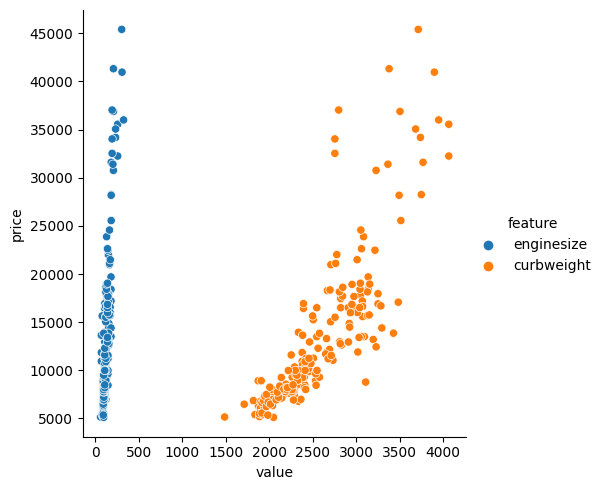

In [11]:
# 6 create a scatterplot for the melted data

sns.relplot(data = cars_melt, x = 'value', y = 'price',
           hue = 'feature');


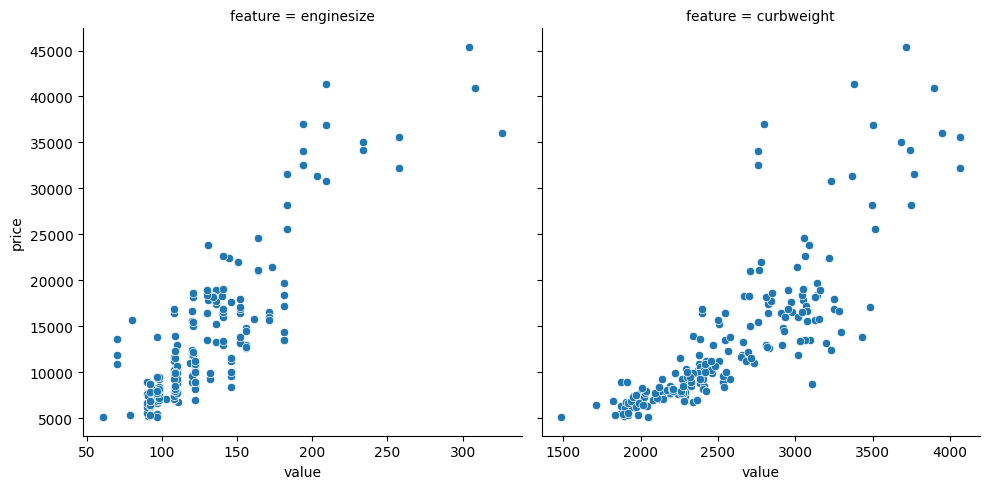

In [12]:
# 6a use the col parameter to create a subplot of each feature
#    and use facet_kws to give each subplot an independent x-axis

sns.relplot(data = cars_melt, x = 'value', y = 'price',
           col = 'feature', facet_kws = {'sharex':False});


## Rank the data by price

In [16]:
# 7 add a priceRank column that ranks each row by the price value
cars['priceRank'] = cars.price.rank()

In [21]:
# 8 display the ten rows with the lowest price in ascending order from lowest price to highest
#   note: that the ranks for 8 and 9 have been averaged

cars.sort_values('price').head(20)

,aspiration,carbody,enginesize,curbweight,price,priceRank
138,std,hatchback,97,2050,5118.0,1.0
18,std,hatchback,61,1488,5151.0,2.0
50,std,hatchback,91,1890,5195.0,3.0
150,std,hatchback,92,1985,5348.0,4.0
76,std,hatchback,92,1918,5389.0,5.0
32,std,hatchback,79,1837,5399.0,6.0
89,std,sedan,97,1889,5499.0,7.0
118,std,hatchback,90,1918,5572.0,8.5
21,std,hatchback,90,1876,5572.0,8.5
51,std,hatchback,91,1900,6095.0,10.0


## Bin the data with quantiles

In [22]:
# 9 use the qcut() method to create three price bins for the data: low, medium, and high
#    store these bins in a new column named priceGrade

cars['priceGrade'] = pd.qcut(cars.price, q = 3, labels = ['low', 'medium', 'high'])

cars.head(25)


,aspiration,carbody,enginesize,curbweight,price,priceRank,priceGrade
0,std,convertible,130,2548,13495.000,132.0,medium
1,std,convertible,130,2548,16500.000,152.5,high
2,std,hatchback,152,2823,16500.000,152.5,high
3,std,sedan,109,2337,13950.000,138.0,high
4,std,sedan,136,2824,17450.000,164.0,high
5,std,sedan,136,2507,15250.000,143.0,high
6,std,sedan,136,2844,17710.000,166.0,high
7,std,wagon,136,2954,18920.000,176.0,high
8,turbo,sedan,131,3086,23875.000,186.0,high
9,turbo,hatchback,131,3053,17859.167,167.0,high


In [23]:
# 10 use value_count method to display the number of values for each bin in the priceGrade column

cars.priceGrade.value_counts()

low       69
medium    68
high      68
Name: priceGrade, dtype: int64

## Group and aggregate the data

In [24]:
# 11 group the cars data by the priceGrade column and 
#    use the agg() method to display the min and max price for each group
#    this should the highest and lowest prices for each bin

cars.groupby('priceGrade').price.agg(['min', 'max'])


,min,max
priceGrade,,
low,5118.0,8449.0
medium,8495.0,13860.0
high,13950.0,45400.0


In [27]:
# 12 group the data by the carbody and aspiration columns and get the average price for each group
#    this returns a Series object with an index created from the carbody and aspriration columns

cars.groupby(['carbody', 'aspiration']).price.mean()


carbody      aspiration
convertible  std           21890.500000
hardtop      std           21356.000000
             turbo         28176.000000
hatchback    std            9699.605263
             turbo         13345.243615
sedan        std           13660.371795
             turbo         17307.833333
wagon        std           10973.600000
             turbo         17965.400000
Name: price, dtype: float64

In [31]:
# 13 unstack the aspiration column of the index so the aspriration values are diplayed as a column

cars.groupby(['carbody', 'aspiration']).price.mean().unstack()

aspiration,std,turbo
carbody,,
convertible,21890.500000,NaN
hardtop,21356.000000,28176.000000
hatchback,9699.605263,13345.243615
sedan,13660.371795,17307.833333
wagon,10973.600000,17965.400000


In [36]:
# 14 use the pivot_table() method to accomplish the same task as the previous 2 cells

cars.pivot_table(index = 'carbody', columns = 'aspiration', values = 'price', aggfunc = 'mean')

aspiration,std,turbo
carbody,,
convertible,21890.500000,NaN
hardtop,21356.000000,28176.000000
hatchback,9699.605263,13345.243615
sedan,13660.371795,17307.833333
wagon,10973.600000,17965.400000


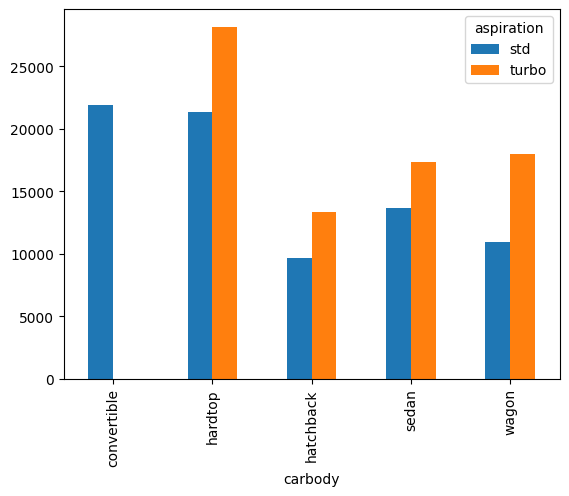

In [42]:
# 15 use the Pandas plot() method to create a bar chart for the DataFrame created in the previous cell

cars.pivot_table(index = 'carbody', columns = 'aspiration', values = 'price', aggfunc = 'mean').plot.bar();